In [12]:
import pandas as pd
tabela = pd.read_excel("Relatorio.xlsx")

num_linhas = len(tabela)
num_colunas = len(tabela.columns)
num_cliente = tabela['Cliente'].nunique()
num_servicos = tabela['Serviço'].nunique()
num_atprioritario = tabela['At. Prioritário'].value_counts()
num_guiche = tabela['Func.'].nunique()
num_senha = tabela['Senha'].nunique()
servicos = tabela.drop_duplicates(subset='Serviço')

print(f"Relatorio do mês de março")
print(f"A tabela possui : {num_linhas} linhas e {num_colunas} colunas")
print(f"Número de Clientes: {num_cliente}")
print(f"Quantidade de senhas geradas: {num_senha}")
print(f"Número de Serviços: {num_servicos}")
print(f"Número de Guichê: {num_guiche}")
print(f"Quantidade de atendimentos Prioritários: {num_atprioritario}")
display(tabela.head(5))


Relatorio do mês de março
A tabela possui : 1183 linhas e 12 colunas
Número de Clientes: 1182
Quantidade de senhas geradas: 1182
Número de Serviços: 9
Número de Guichê: 3
Quantidade de atendimentos Prioritários: At. Prioritário
Não           736
Sim           446
Total 1182      1
Name: count, dtype: int64


,Senha,Cliente,Data,Hr.Chegada,Hr.Chamada,Hr.Inicio,Fim Atend.,Duração Atend.,Serviço,Guichê,Func.,At. Prioritário
0,1000.0,1.0,2024-03-11,09:12:49,09:57:28,09:57:28,10:25:09,00:27:41,PRIORITÁRIO RESSONÂNCIA MAG.,2.0,guiche02,Sim
1,1001.0,2.0,2024-03-11,09:23:41,10:02:03,10:02:03,10:38:54,00:36:51,PRIORITÁRIO RESSONÂNCIA MAG.,3.0,guiche03,Sim
2,1002.0,3.0,2024-03-11,09:25:07,10:35:35,10:35:35,10:52:37,00:17:02,PRIORITÁRIO RESSONÂNCIA MAG.,1.0,guiche01,Sim
3,1003.0,4.0,2024-03-11,12:09:39,12:16:30,12:16:30,12:29:57,00:13:27,PRIORITÁRIO RESSONÂNCIA MAG.,1.0,guiche01,Sim
4,1004.0,5.0,2024-03-11,12:39:40,12:52:09,12:52:09,13:00:06,00:07:57,PRIORITÁRIO RESSONÂNCIA MAG.,2.0,guiche02,Sim


In [13]:
import pandas as pd

tabela = pd.read_excel("Relatorio.xlsx")
cont_services = tabela['Serviço'].value_counts()
display(cont_services)

Serviço
NORMAL RESSONÂNCIA MAG.         435
PRIORITÁRIO RESSONÂNCIA MAG.    268
NORMAL ULTRASSOM                225
PRIORITÁRIO ULTRASSOM           159
NORMAL MAMOGRAFIA                60
PRIORITÁRIO MAMOGRAFIA           18
NORMAL LABORATÓRIO               10
NORMAL CONSULTA                   6
PRIORITÁRIO LABORATÓRIO           1
Name: count, dtype: int64

In [14]:
import pandas as pd

tabela = pd.read_excel("Relatorio.xlsx")
all_services = ['PRIORITÁRIO RESSONÂNCIA MAG.', 
                'PRIORITÁRIO ULTRASSOM', 
                'NORMAL RESSONÂNCIA MAG.', 
                'NORMAL ULTRASSOM', 
                'NORMAL MAMOGRAFIA', 
                'PRIORITÁRIO MAMOGRAFIA', 
                'NORMAL LABORATÓRIO', 
                'NORMAL CONSULTA', 
                'PRIORITÁRIO LABORATÓRIO']
tabela_filtrado = tabela[tabela['Serviço'].isin(all_services)]
num_servicos = tabela_filtrado['Serviço'].nunique()

funcoes_por_servico = tabela_filtrado.groupby('Serviço')['Func.'].value_counts()
display(funcoes_por_servico)

Serviço                       Func.   
NORMAL CONSULTA               guiche02      3
                              guiche01      3
NORMAL LABORATÓRIO            guiche03     10
NORMAL MAMOGRAFIA             guiche02     31
                              guiche01     26
                              guiche03      3
NORMAL RESSONÂNCIA MAG.       guiche02    238
                              guiche01    152
                              guiche03     45
NORMAL ULTRASSOM              guiche01    199
                              guiche03     13
                              guiche02     13
PRIORITÁRIO LABORATÓRIO       guiche03      1
PRIORITÁRIO MAMOGRAFIA        guiche01     11
                              guiche02      5
                              guiche03      2
PRIORITÁRIO RESSONÂNCIA MAG.  guiche02    144
                              guiche01    100
                              guiche03     24
PRIORITÁRIO ULTRASSOM         guiche01    143
                              guiche02   

In [24]:
import pandas as pd
import datetime

# Carregar a tabela a partir de um arquivo Excel
tabela = pd.read_excel("Relatorio.xlsx")

# Função auxiliar para converter valores de datetime.time para timedelta
def convert_to_timedelta(value):
    if isinstance(value, datetime.time):
        return pd.to_timedelta(f"{value.hour:02}:{value.minute:02}:{value.second:02}")
    elif isinstance(value, str):
        return pd.to_timedelta(value)
    else:
        return pd.to_timedelta('0:00:00')  # Lidar com outros casos, retornando 0 para durações não reconhecidas

# Aplicar a função de conversão na coluna 'Duração Atend.'
tabela['Duração Atend.'] = tabela['Duração Atend.'].apply(convert_to_timedelta)

# Somar todas as durações da coluna 'Duração Atend.'
total_horas = tabela['Duração Atend.'].sum()

# Exibir o resultado total
print("Total de horas:", total_horas)

# Opcional: Formatar o total de horas para exibição
total_seconds = total_horas.total_seconds()
hours = total_seconds // 3600
minutes = (total_seconds % 3600) // 60
print(f"Total de horas: {int(hours)} horas e {int(minutes)} minutos")


Total de horas: 11 days 07:18:13
Total de horas: 271 horas e 18 minutos


In [3]:
import pandas as pd

tabela = pd.read_excel("Relatorio.xlsx")
tabela ['Data'] = pd.to_datetime (tabela [ 'Data'], format='%d-%m-%Y')

data_especifica = input("Digite a data (dd-mm-yyyy): ")
try:
    data_especifica = pd.to_datetime(data_especifica, format='%d-%m-%Y').date()
except ValueError:
    print("Data inválida. Encerrando o programa.")
    exit()

tabela_filtrado = tabela[tabela['Data'].dt.date == data_especifica]
total_ocorrencias = tabela['Data'].unique()
total_ocorrencias = tabela_filtrado.shape[0]
print(f"Total de ocorrências da data {data_especifica}: {total_ocorrencias}")

Digite a data (dd-mm-yyyy):  03-03-2024


Total de ocorrências da data 2024-03-03: 6


,Serviço,Quantidade
0,NORMAL RESSONÂNCIA MAG.,435
1,PRIORITÁRIO RESSONÂNCIA MAG.,268
2,NORMAL ULTRASSOM,225
3,PRIORITÁRIO ULTRASSOM,159
4,NORMAL MAMOGRAFIA,60
5,PRIORITÁRIO MAMOGRAFIA,18
6,NORMAL LABORATÓRIO,10
7,NORMAL CONSULTA,6
8,PRIORITÁRIO LABORATÓRIO,1


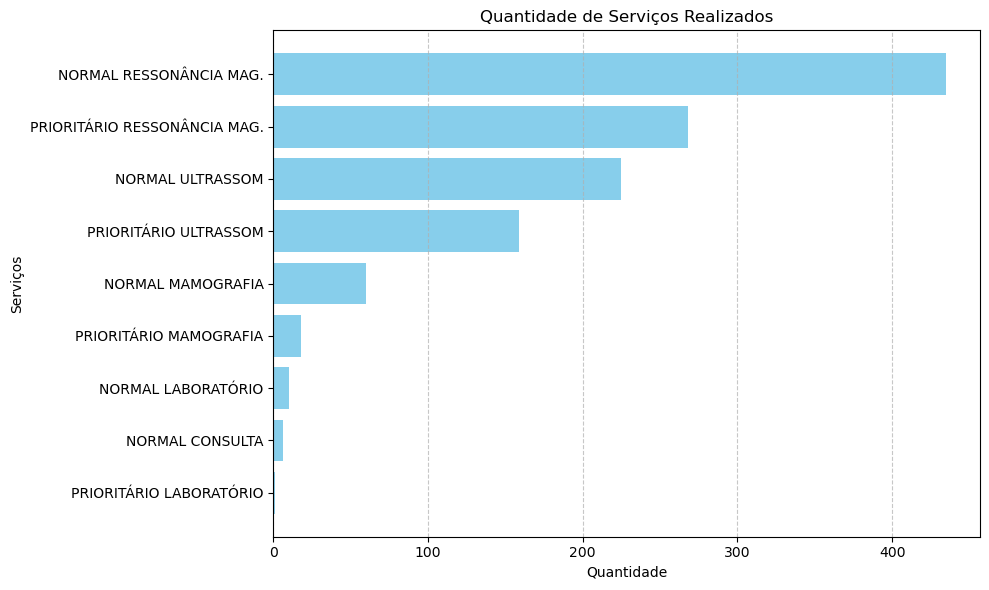

In [4]:
import matplotlib.pyplot as plt
import pandas as pd 

data = {
    'Serviço': [
        'NORMAL RESSONÂNCIA MAG.', 'PRIORITÁRIO RESSONÂNCIA MAG.', 'NORMAL ULTRASSOM',
        'PRIORITÁRIO ULTRASSOM', 'NORMAL MAMOGRAFIA', 'PRIORITÁRIO MAMOGRAFIA',
        'NORMAL LABORATÓRIO', 'NORMAL CONSULTA', 'PRIORITÁRIO LABORATÓRIO'
    ],
    'Quantidade': [435, 268, 225, 159, 60, 18, 10, 6, 1]
}

df = pd.DataFrame(data)
display(df)
plt.figure(figsize=(10, 6))
plt.barh(df['Serviço'], df['Quantidade'], color='skyblue')
plt.xlabel('Quantidade')
plt.ylabel('Serviços')
plt.title('Quantidade de Serviços Realizados')
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()